In [2]:
import cv2
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_test.csv')

In [5]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
print('train shape',str(train.shape),"\ntest shape",test.shape)

train shape (27455, 785) 
test shape (7172, 785)


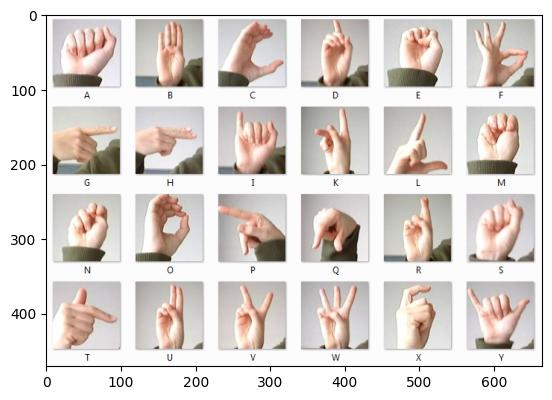

In [7]:
img = plt.imread('/content/gdrive/MyDrive/amer_sign2.png')
plt.imshow(img)

In [8]:
train.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [9]:
labels = train.label.unique()
labels

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [10]:
train.label.max()

24

In [11]:
y_train =train['label']
y_test =test['label']
x_train=train.drop('label',axis=1)
x_test=test.drop('label',axis=1)
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


In [12]:
x_train = x_train / 255
x_test = x_test / 255
y_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [13]:
# Convert labels to one-hot encoded vectors
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [14]:
print(y_test[1])

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

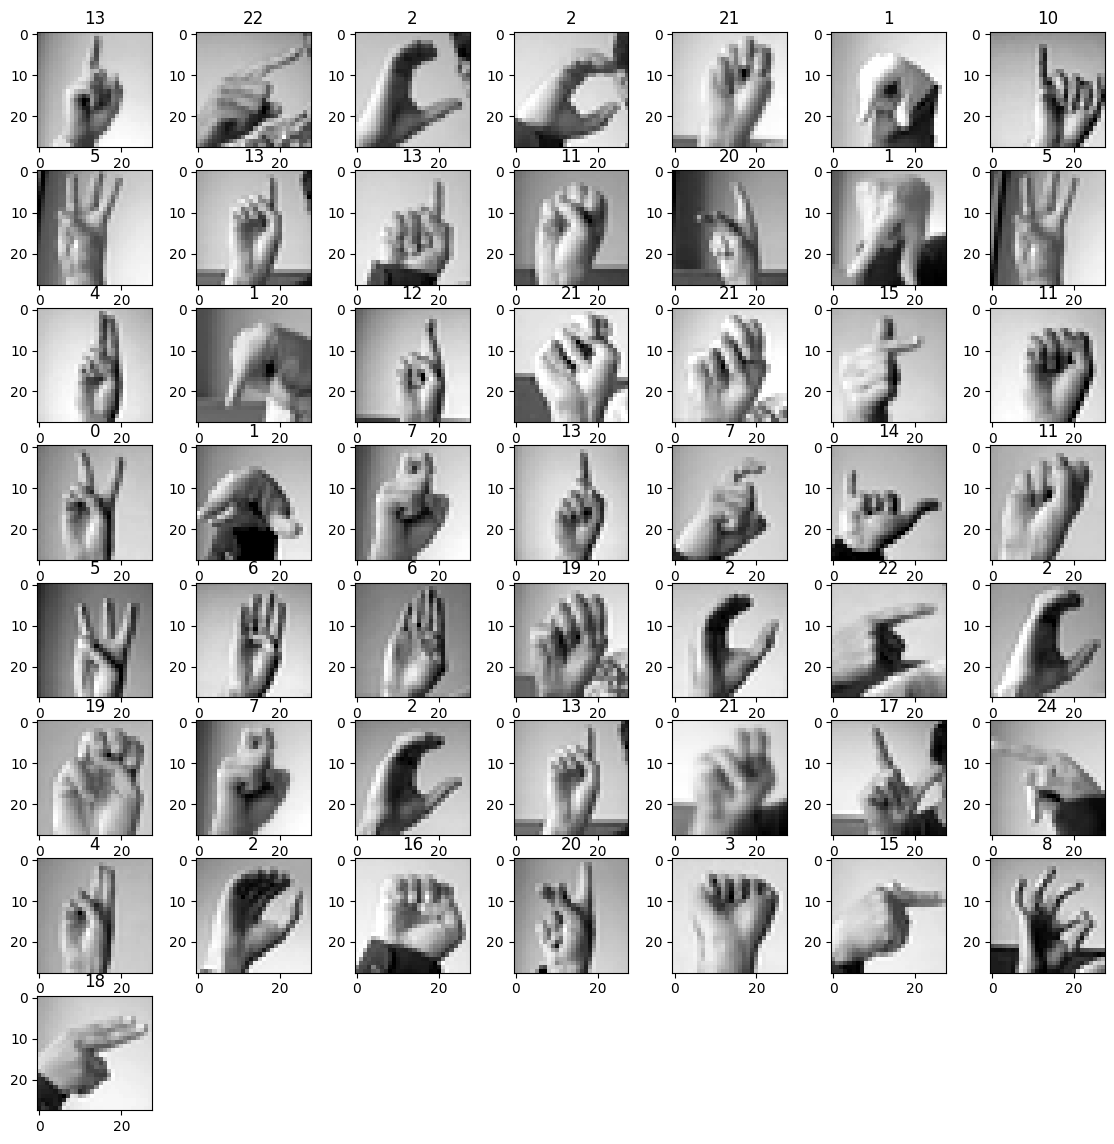

In [16]:
plt.figure(figsize=(14,14))
x, y = 7, 8
for i in range(50):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap= 'gray')
    plt.title(labels[list(y_train[i].astype(int)).index(1)])
plt.show()

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [18]:
# CNN model
model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape = (28, 28, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), padding = 'same', activation='relu'))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 activation (Activation)     (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          9

In [21]:
his = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
858/858 [==============================] - 42s 49ms/step - loss: 0.0344 - accuracy: 0.9877 - val_loss: 0.2133 - val_accuracy: 0.9470
Epoch 2/5
858/858 [==============================] - 35s 40ms/step - loss: 0.0362 - accuracy: 0.9871 - val_loss: 0.1940 - val_accuracy: 0.9424
Epoch 3/5
858/858 [==============================] - 34s 40ms/step - loss: 0.0316 - accuracy: 0.9891 - val_loss: 0.2167 - val_accuracy: 0.9498
Epoch 4/5
858/858 [==============================] - 37s 43ms/step - loss: 0.0282 - accuracy: 0.9900 - val_loss: 0.2136 - val_accuracy: 0.9543
Epoch 5/5
858/858 [==============================] - 35s 41ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.3573 - val_accuracy: 0.9335


In [22]:
loss, score = model.evaluate(x_test, y_test, verbose=0)
print(score*100)

93.34913492202759


1/1 [==============================] - 0s 87ms/step


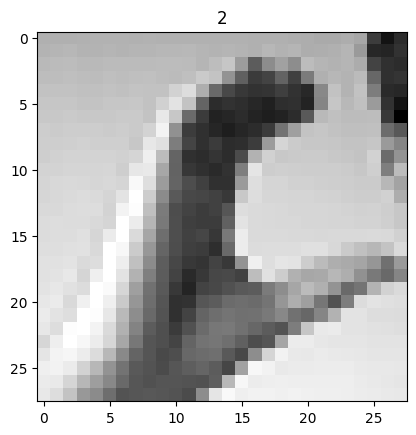

In [27]:
def predict_sample(index):
  y_pred = model.predict(x_test[index:index + 1])
  plt.imshow(x_test[index], cmap= 'gray')
  # check el 1 3and anhy name w ye5aleeh el index el gowa el emotion 3ashan yetala3 el emotion
  # w 3ashan t5aleha zay el title goz2 men el pic w f nos w kda han7otaha gowa plt.title
  plt.title(labels[list(y_pred.astype(int).flatten()).index(1)])
  #plt.title(labels[list(y_train[i].astype(int)).index(1)])


predict_sample(20)


In [24]:
predictions = model.predict(x_test)
predictions=np.argmax(predictions,axis=1)
predictions +=1

225/225 [==============================] - 3s 14ms/step


In [28]:
predictions[20]

3

In [29]:
label_mapping = {
    0: 'V',
    1: 'Q',
    2: 'C',
    3: 'A',
    4: 'U',
    5: 'W',
    6: 'B',
    7: 'X',
    8: 'F',
    16: 'E',
    22: 'G',
    18: 'H',
    10: 'I',
    20: 'k',
    17: 'L',
    19: 'M',
    21: 'N',
    23: 'O',
    24: 'P',
    12: 'R',
    11: 'S',
    15: 'T',
    14: 'Y',
    13: 'D',

}

# Convert numeric labels to character labels
labels = [label_mapping[label] for label in labels]

# Print the original numeric labels and their corresponding character labels
#for num_label, char_label in zip(numeric_labels, character_labels):
 #   print(f"Numeric Label: {num_label}, Character Label: {char_label}")
#labels

1/1 [==============================] - 0s 38ms/step


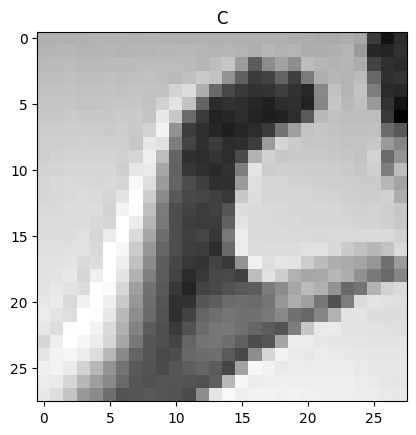

In [31]:
def predict_sample(index):
  y_pred = model.predict(x_test[index:index + 1])
  plt.imshow(x_test[index], cmap= 'gray')
  # check el 1 3and anhy name w ye5aleeh el index el gowa el emotion 3ashan yetala3 el emotion
  # w 3ashan t5aleha zay el title goz2 men el pic w f nos w kda han7otaha gowa plt.title
  #plt.title(labels[list(y_pred.astype(int).flatten()).index(1)])
  plt.title(labels[list(y_test[index].astype(int)).index(1)])


predict_sample(20)

In [32]:
import joblib
joblib.dump(model, 'sign_model') # model name

['sign_model']

In [ ]:
# import cv2
# import numpy as np
# import mediapipe as mp
# from tensorflow.keras.models import load_model

# # Load your trained model
# model = load_model('/content/sign_model')

# # Define labels corresponding to letters A-Z
# labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# # Initialize webcam
# cap = cv2.VideoCapture(0)

# # Initialize Mediapipe hand detection
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands()

# while True:
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Convert the frame to RGB
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#     # Detect hands using Mediapipe
#     results = hands.process(rgb_frame)

#     if results.multi_hand_landmarks:
#         # Get the bounding box of the hand
#         for landmarks in results.multi_hand_landmarks:
#             x_min, x_max, y_min, y_max = 1000, 0, 1000, 0
#             for landmark in landmarks.landmark:
#                 x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
#                 if x < x_min:
#                     x_min = x
#                 if x > x_max:
#                     x_max = x
#                 if y < y_min:
#                     y_min = y
#                 if y > y_max:
#                     y_max = y

#             # Extract hand region
#             hand_frame = frame[y_min:y_max, x_min:x_max]

#             if hand_frame.shape[0] > 0 and hand_frame.shape[1] > 0:
#                 # Preprocess the hand frame
#                 resized_hand_frame = cv2.resize(hand_frame, (28, 28))
#                 grayscale_hand_frame = cv2.cvtColor(resized_hand_frame, cv2.COLOR_BGR2GRAY)
#                 flattened_hand_frame = grayscale_hand_frame.flatten()
#                 normalized_hand_frame = flattened_hand_frame / 255.0

#                 # Make a prediction
#                 input_frame = normalized_hand_frame.reshape(1, 784)
#                 prediction = model.predict(input_frame)
#                 predicted_label = np.argmax(prediction)

#                 # Get the corresponding letter
#                 letter = labels[predicted_label]

#                 # Display the prediction on the hand frame
#                 cv2.putText(hand_frame, letter, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#                 # Display both frames in separate windows
#                 cv2.imshow('Original Frame', frame)
#                 cv2.imshow('Hand Frame', hand_frame)

#     # Exit when 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close all windows
# cap.release()
# cv2.destroyAllWindows()